In [1]:
!python --version

Python 3.10.12


**Dependencies**

In [2]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install -e .

Cloning into 'diffusers'...
remote: Enumerating objects: 60502, done.
remote: Counting objects: 100% (502/502), done.
remote: Compressing objects: 100% (332/332), done.
remote: Total 60502 (delta 311), reused 274 (delta 147), pack-reused 60000
Receiving objects: 100% (60502/60502), 42.06 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (44028/44028), done.
/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-0.editable-py3-none-any.whl size=11104 sha256=35fec7bb8bd4bdcf81a98f8e1668d4b6e8dbcd73094fcb09cbd0f649d30f8fe6
  Stored in directory: /tmp/pip-ephem-wheel-cache-54s3grnu/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built d

In [3]:
%cd examples/custom_diffusion
!pip install -r requirements.txt

/content/diffusers/examples/custom_diffusion
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 9.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using ca

In [4]:
# Index is not available
# !pip install clip-retrieval

**Data Preparation**

Personal Image Samples

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Class Image Samples

In [6]:
# Index is not available
# !python retrieve.py --class_prompt tumbler --class_data_dir samples_tumbler --num_class_images 200

Alternative: Loading conceptual-12m
https://github.com/google-research-datasets/conceptual-12m

Copy Dataset to Current Folder

In [7]:
from distutils.dir_util import copy_tree

In [8]:
copy_tree('/content/drive/MyDrive/Work/Application/VoyceMe/dataset', 'dataset')
copy_tree('/content/drive/MyDrive/Work/Application/VoyceMe/tumbler_reg_samples', 'tumbler_reg_samples')

['tumbler_reg_samples/caption.txt',
 'tumbler_reg_samples/urls.txt',
 'tumbler_reg_samples/images.txt',
 'tumbler_reg_samples/images/54.jpg',
 'tumbler_reg_samples/images/48.jpg',
 'tumbler_reg_samples/images/24.jpg',
 'tumbler_reg_samples/images/0.jpg',
 'tumbler_reg_samples/images/89.jpg',
 'tumbler_reg_samples/images/11.jpg',
 'tumbler_reg_samples/images/66.jpg',
 'tumbler_reg_samples/images/17.jpg',
 'tumbler_reg_samples/images/26.jpg',
 'tumbler_reg_samples/images/82.jpg',
 'tumbler_reg_samples/images/43.jpg',
 'tumbler_reg_samples/images/105.jpg',
 'tumbler_reg_samples/images/32.jpg',
 'tumbler_reg_samples/images/113.jpg',
 'tumbler_reg_samples/images/84.jpg',
 'tumbler_reg_samples/images/16.jpg',
 'tumbler_reg_samples/images/106.jpg',
 'tumbler_reg_samples/images/7.jpg',
 'tumbler_reg_samples/images/5.jpg',
 'tumbler_reg_samples/images/97.jpg',
 'tumbler_reg_samples/images/14.jpg',
 'tumbler_reg_samples/images/110.jpg',
 'tumbler_reg_samples/images/83.jpg',
 'tumbler_reg_samples

**Training**

In [9]:
!ls

dataset    requirements.txt  test_custom_diffusion.py	tumbler_reg_samples
README.md  retrieve.py	     train_custom_diffusion.py


In [10]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [11]:
!accelerate launch train_custom_diffusion.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4"  \
  --instance_data_dir="dataset" \
  --output_dir="custom_diffusion_model" \
  --class_data_dir="tumbler_reg_samples" \
  --with_prior_preservation --real_prior --prior_loss_weight=1.0 \
  --class_prompt="tumbler" --num_class_images=130 \
  --instance_prompt="photo of a <my> tumbler"  \
  --resolution=512  \
  --train_batch_size=2  \
  --learning_rate=1e-5  \
  --lr_warmup_steps=0 \
  --max_train_steps=250 \
  --scale_lr --hflip  \
  --modifier_token "<my>"  \
  --no_safe_serialization
# Steps: 100% 250/250 [15:57<00:00,  3.83s/it, loss=0.624, lr=4e-5]

04/24/2024 01:07:48 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

2024-04-24 01:07:49.909433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 01:07:49.909494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 01:07:49.911129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-24 01:07:51.029929: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
tokenizer/tokenizer_config.json: 100% 806/806 [00:00<00:00, 3.49MB/s]
tokeni

In [12]:
copy_tree('custom_diffusion_model', '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model')

['/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/<my>.bin',
 '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/checkpoint-250/model.safetensors',
 '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/checkpoint-250/optimizer.bin',
 '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/checkpoint-250/random_states_0.pkl',
 '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/checkpoint-250/custom_checkpoint_0.pkl',
 '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/checkpoint-250/model_1.safetensors',
 '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/checkpoint-250/scheduler.bin',
 '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/pytorch_custom_diffusion_weights.bin',
 '/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model/logs/custom-diffusion/events.out.tfevents.1713920872.34aeb3d09b98.2470.0',
 '/con

**Inference**

In [13]:
# copy_tree('/content/drive/MyDrive/Work/Application/VoyceMe/custom_diffusion_model', 'custom_diffusion_model')

In [14]:
!pip uninstall -y diffusers
!pip install --upgrade diffusers[torch]

Found existing installation: diffusers 0.28.0.dev0
Uninstalling diffusers-0.28.0.dev0:
  Successfully uninstalled diffusers-0.28.0.dev0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.1 MB/s eta 0:00:00


In [15]:
import torch
from diffusers import DiffusionPipeline

In [16]:
custom_diffusion_model = "/content/diffusers/examples/custom_diffusion/custom_diffusion_model"

In [17]:
pipe = DiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16
).to("cuda")
pipe.unet.load_attn_procs(
    custom_diffusion_model, weight_name="pytorch_custom_diffusion_weights.bin"
)
pipe.load_textual_inversion(custom_diffusion_model, weight_name="<my>.bin")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

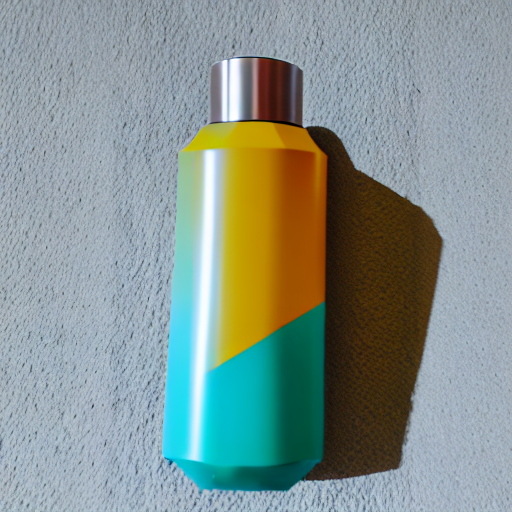

In [32]:
image = pipe(
    "<my> tumbler",
    num_inference_steps=100,
    guidance_scale=10.0,
    eta=1
).images[0]
image

In [ ]:
# image.save("generated_tumbler.png")